<a href="https://colab.research.google.com/github/Idk507/computer_vision_learning_cnn/blob/main/Transfer_Learning_fineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
from tensorflow.keras import models

In [34]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2024-02-04 08:34:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-04 08:34:45 (42.0 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [35]:
#downloading the dataset

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2024-02-04 08:34:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.207, 142.251.162.207, 173.194.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   205MB/s    in 0.8s    

2024-02-04 08:34:46 (205 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [36]:
#create training and test directory paths

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [37]:
#tensorflow image data from directory
"""
tf.keras.preprcessing.image.image_dataset_from_directory

"""

import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=(IMG_SIZE),label_mode="categorical",batch_size=32)

Found 750 files belonging to 10 classes.


In [38]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory= test_dir,image_size=IMG_SIZE,label_mode="categorical",batch_size=32)

Found 2500 files belonging to 10 classes.


In [39]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [40]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [41]:
#see an example of batch of data

for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[ 70.30102   164.0153    208.57143  ]
   [110.09184   197.30612   225.2602   ]
   [118.07143   199.64287   211.42857  ]
   ...
   [197.0051    207.21936    76.86215  ]
   [192.85713   200.92857    62.622395 ]
   [193.00008   202.00008    58.285713 ]]

  [[ 46.79082   142.21939   189.95918  ]
   [ 91.637764  180.85715   211.64285  ]
   [103.16837   184.82654   198.29593  ]
   ...
   [193.3724    203.58667    71.21416  ]
   [186.01021   197.01021    57.943855 ]
   [189.88272   201.8113     58.117413 ]]

  [[ 36.9949    134.13776   190.13266  ]
   [ 78.81633   168.9439    204.05612  ]
   [ 87.92857   170.7143    187.04591  ]
   ...
   [191.85707   203.47443    69.78053  ]
   [187.71431   197.9286     62.27043  ]
   [195.21439   205.42868    69.41846  ]]

  ...

  [[226.28574   220.28574   206.28574  ]
   [231.03062   225.03062   211.03062  ]
   [237.81123   231.81123   217.81123  ]
   ...
   [223.38264   233.38264   235.38264  ]
   [222.92856   232.92856   234.92856  ]
   [2

In [42]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#Freeze the base model (so inderlying the pretrained patters aren't updates)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

#Using ResNet50V2 ,normalize inputs not for efficient

#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

#Pass the inputs to the base model

x = base_model(inputs)
print(x.shape)

#average pool the outputs of the base model

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#output_layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

#compile the model

model_0 = tf.keras.Model(inputs,outputs)
model_0.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

(None, 7, 7, 1280)


In [43]:
history_10_percent = model_0.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data = test_data,validation_steps=int(0.25 * len(test_data)))

Epoch 1/5
24/24 [==============================] - 192s 7s/step - loss: 1.8499 - accuracy: 0.4480 - val_loss: 1.2931 - val_accuracy: 0.7352
Epoch 2/5
24/24 [==============================] - 98s 4s/step - loss: 1.0848 - accuracy: 0.7667 - val_loss: 0.8785 - val_accuracy: 0.8207
Epoch 3/5
24/24 [==============================] - 141s 6s/step - loss: 0.7832 - accuracy: 0.8280 - val_loss: 0.6990 - val_accuracy: 0.8503
Epoch 4/5
24/24 [==============================] - 135s 6s/step - loss: 0.6444 - accuracy: 0.8547 - val_loss: 0.5941 - val_accuracy: 0.8668
Epoch 5/5
24/24 [==============================] - 132s 6s/step - loss: 0.5483 - accuracy: 0.8773 - val_loss: 0.5513 - val_accuracy: 0.8651


In [44]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
________________

In [45]:
#base_model.summary()

In [65]:
model_0.evaluate(test_data)

79/79 [==============================] - 194s 2s/step - loss: 0.5553 - accuracy: 0.8644


[0.5553272366523743, 0.8644000291824341]

In [47]:
#for layer_number,layer in enumerate(base_model.layers):
  #print(layer_number,layer.name)

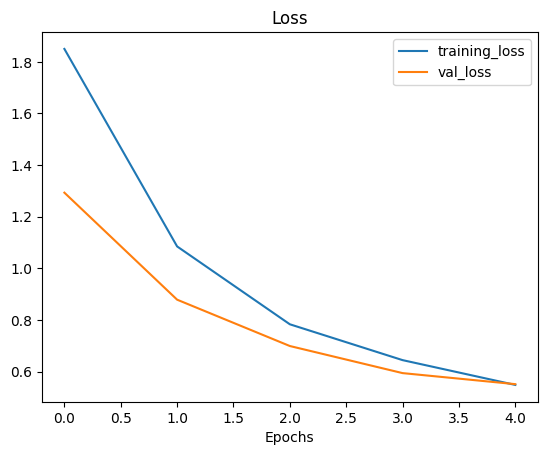

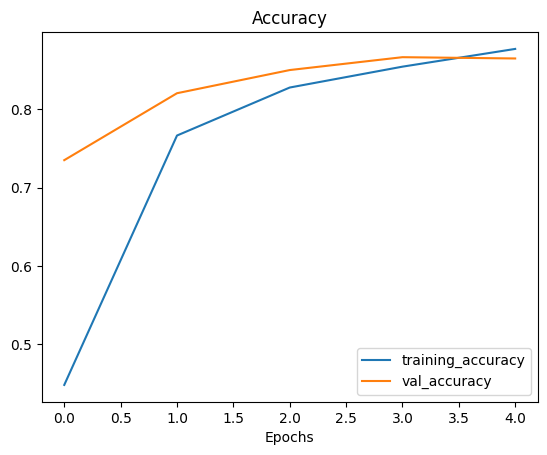

In [48]:
plot_loss_curves(history_10_percent)

Global Average Pooling Layer

In [49]:
input_shape = (1,4,4,3)

input_tensor = tf.random.normal(input_shape)
#input_tensor
#pass the rndom tensor to Global Avg pool
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

global_average_pooled_tensor

#check the shape

input_tensor.shape , global_average_pooled_tensor.shape

(TensorShape([1, 4, 4, 3]), TensorShape([1, 3]))

In [50]:
#lets replicate the global average pool2d layers

tf.reduce_mean(input_tensor,axis=[1,2])


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.4146148 , -0.2913772 ,  0.33445588]], dtype=float32)>

In [51]:
"""
model 1 - feature extraction transfer learning with 1% of training data with data augumentation
model 2 - feature extraction transfer learning with 10% of the training with data augumentaion
model3-use fine tuning transfer learning on 100% of training data
model 4 - same as model3
"""

'\nmodel 1 - feature extraction transfer learning with 1% of training data with data augumentation\nmodel 2 - feature extraction transfer learning with 10% of the training with data augumentaion\nmodel3-use fine tuning transfer learning on 100% of training data\nmodel 4 - same as model3\n'

In [52]:


# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2024-02-04 08:50:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.207, 108.177.13.207, 74.125.26.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   147MB/s    in 0.9s    

2024-02-04 08:50:38 (147 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [53]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'

In [54]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,image_size=(IMG_SIZE),label_mode="categorical",batch_size=32)

Found 70 files belonging to 10 classes.


In [55]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory= test_dir,image_size=IMG_SIZE,label_mode="categorical",batch_size=32)

Found 2500 files belonging to 10 classes.


In [56]:
#data augumentation

#TO add data augumentation into our models ,we use layers inside,
"""
tf.keras.layers.experimental.preprocessing()
"""

'\ntf.keras.layers.experimental.preprocessing()\n'

In [57]:
from tensorflow.keras.layers.experimental import preprocessing

data_augumentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
],name="data_augumentation")



In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)

In [59]:
target_dir = "10_food_classes_1_percent/train/" + target_class
target_dir

'10_food_classes_1_percent/train/steak'

In [60]:
train_data_1_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

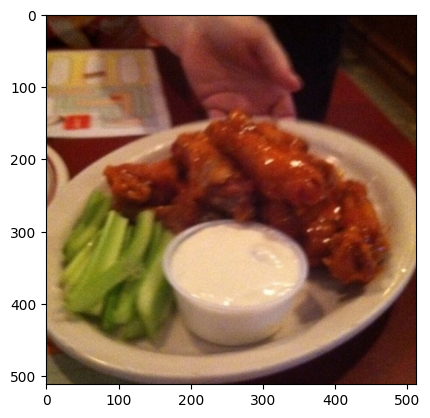

In [61]:
random_image_path = random.choice(os.listdir(target_dir))
img = mpimg.imread("/content/10_food_classes_1_percent/test/chicken_wings/1010547.jpg")
plt.axis()
plt.imshow(img)

Model 1: Feature Extraction transfer learning on 1% of the data with data augumentation

In [62]:
input_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [68]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import keras


In [69]:
#create input layer

input = layers.Input(shape = input_shape,name="input_layer")

#add in data augumentation sequential model as layers
x = data_augumentation(input)
x = base_model(x,training=False)

#pool output
x = layers.GlobalAveragePooling2D()(x)

#output layer
outputs = layers.Dense(10,activation="softmax",name="output_layer")(x)

#model using the inputs and outputs

model_1 = keras.Model(input,outputs)

#comile the model
model_1.compile(loss="categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(),metrics=["accuracy"])


In [70]:
#train the model
model_1.fit(train_data_1_percent,epochs=5,steps_per_epoch=len(train_data_1_percent),
           validation_data = test_data,validation_steps= int(0.25 * len(test_data)),callbacks = [create_tensorboard_callback(dir_name="transfer_learning",experiment_name="1_percent_data_aug")] )

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240204-090420
Epoch 1/5
3/3 [==============================] - 67s 24s/step - loss: 2.4090 - accuracy: 0.1143 - val_loss: 2.2881 - val_accuracy: 0.1562
Epoch 2/5
3/3 [==============================] - 87s 42s/step - loss: 2.1464 - accuracy: 0.2571 - val_loss: 2.1257 - val_accuracy: 0.2188
Epoch 3/5
3/3 [==============================] - 49s 23s/step - loss: 1.8819 - accuracy: 0.3714 - val_loss: 2.0309 - val_accuracy: 0.2961
Epoch 4/5
3/3 [==============================] - 79s 36s/step - loss: 1.7656 - accuracy: 0.5000 - val_loss: 1.9338 - val_accuracy: 0.3487
Epoch 5/5
3/3 [==============================] - 89s 43s/step - loss: 1.6201 - accuracy: 0.6000 - val_loss: 1.8356 - val_accuracy: 0.4112


In [71]:
#check out a model summary
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augumentation (Sequen  (None, None, None, 3)     0         
 tial)                                                           
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [72]:
IMG_SIZE + (3,)

(224, 224, 3)

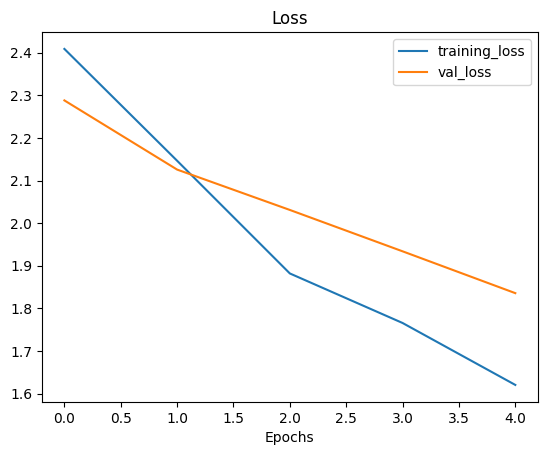

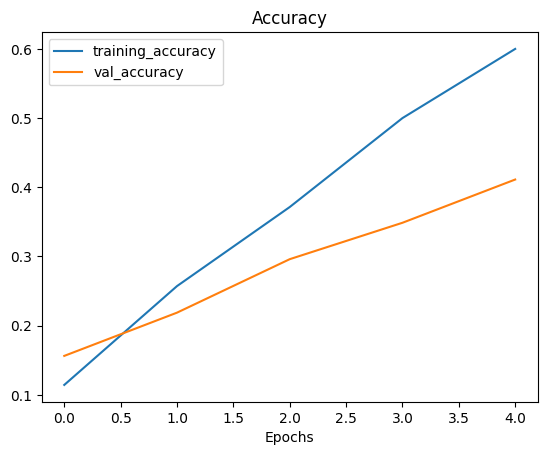

In [73]:
plot_loss_curves(model_1.history)

In [74]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 188s 2s/step - loss: 1.8449 - accuracy: 0.4216


[1.8449461460113525, 0.42160001397132874]

Model 2 : Same as model 0 but preprocess as model 1

In [75]:
#model 2 feature extraction

data_augumentation.summary()


Model: "data_augumentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_1 (RandomR  (None, 224, 224, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 random_height_1 (RandomHei  (None, None, 224, 3)      0         
 ght)                                                            
                                                                 
 random_width_1 (RandomWidt  (None, None, None, 3)     0         
 h)                                                              
                                                

In [76]:
from tensorflow.keras.models import Sequential

In [77]:
input_shape = (224,224,3)
data_augumentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
],name="data_augumentation")
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#create inputs and outputs
inputs = layers.Input(shape=input_shape,name="input_layer")
x = data_augumentation(inputs)
x = base_model(x,training=False) #keep the base mode in inference model,this batch noem layers dont get updated
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
output = layers.Dense(10,activation="softmax",name="output_layer")(x)

model_2 = tf.keras.Model(inputs,output)

In [78]:
model_2.compile(loss = "categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [79]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augumentation (Sequen  (None, None, None, 3)     0         
 tial)                                                           
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_2D   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [80]:
#set checkpoint path
checkpoint_path = "ten_percent_model_checkpointswights/checkpoint.ckpt"

#create a modelcheckpoint callback save the model's weight only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weight_only=True,save_best_only=True,save_freq="epoch",verbose=1)

In [81]:
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240204-091636
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9845 - accuracy: 0.3360
Epoch 1: val_loss improved from inf to 1.40973, saving model to ten_percent_model_checkpointswights/checkpoint.ckpt
24/24 [==============================] - 187s 8s/step - loss: 1.9845 - accuracy: 0.3360 - val_loss: 1.4097 - val_accuracy: 0.7418
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3006 - accuracy: 0.7040
Epoch 2: val_loss improved from 1.40973 to 0.97923, saving model to ten_percent_model_checkpointswights/checkpoint.ckpt
24/24 [==============================] - 179s 8s/step - loss: 1.3006 - accuracy: 0.7040 - val_loss: 0.9792 - val_accuracy: 0.8141
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9863 - accuracy: 0.7813
Epoch 3: val_loss improved from 0.97923 to 0.75713, saving model to ten_percent_model_checkpointswights/checkpoint.ckpt
Epoch 4/5
24/24 [=

In [93]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 208s 3s/step - loss: 0.6165 - accuracy: 0.8460


[0.6165186166763306, 0.8460000157356262]

In [94]:
data_augumentation.summary()

Model: "data_augumentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_height_2 (RandomHei  (None, None, 224, 3)      0         
 ght)                                                            
                                                                 
 random_width_2 (RandomWidt  (None, None, None, 3)     0         
 h)                                                              
                                                                 
 random_zoom_2 (RandomZoom)  (None, None, None, 3)     0         
                                                                 
 random_rotation_2 (RandomR  (None, None, None, 3)     0         
 otation)                                                        
                                                

In [95]:

#loading the checkpoints and weights
model_2.evaluate(test_data)



79/79 [==============================] - 219s 3s/step - loss: 0.6165 - accuracy: 0.8460


[0.6165183782577515, 0.8460000157356262]

MODEL 3

In [96]:


#layers in a load model

model_2.layers

In [97]:

for layer in model_2.layers:
  print(layer,layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7c2974d792d0> True
<keras.src.engine.sequential.Sequential object at 0x7c2966feafe0> True
<keras.src.engine.functional.Functional object at 0x7c2966b950c0> True
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7c2974adadd0> True
<keras.src.layers.core.dense.Dense object at 0x7c294bb9c190> True


In [98]:

for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_5 False
1 rescaling_8 False
2 normalization_4 False
3 rescaling_9 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [99]:
#how many trainable variables are in base model
len(model_2.layers[2].trainable_variables)

10

In [100]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [101]:

#recompile

model_2.compile(loss="categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

In [102]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_5 False
1 rescaling_8 False
2 normalization_4 False
3 rescaling_9 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [106]:
fine_tune_epochs = 5 + 5
model_2.fit(train_data_10_percent,epochs = fine_tune_epochs,validation_data = test_data,validation_steps = int(0.25 * len(test_data)),initial_epoch = history_10_percent_data_aug.epoch[-1],callbacks = [create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20240204-095030
Epoch 5/10
24/24 [==============================] - 180s 7s/step - loss: 0.7410 - accuracy: 0.7507 - val_loss: 0.4234 - val_accuracy: 0.8586
Epoch 6/10
24/24 [==============================] - 169s 7s/step - loss: 0.3271 - accuracy: 0.8920 - val_loss: 0.3885 - val_accuracy: 0.8635
Epoch 7/10
24/24 [==============================] - 148s 6s/step - loss: 0.2361 - accuracy: 0.9213 - val_loss: 0.4057 - val_accuracy: 0.8684
Epoch 8/10
24/24 [==============================] - 110s 5s/step - loss: 0.1918 - accuracy: 0.9467 - val_loss: 0.4354 - val_accuracy: 0.8602
Epoch 9/10
24/24 [==============================] - 107s 5s/step - loss: 0.1149 - accuracy: 0.9667 - val_loss: 0.4444 - val_accuracy: 0.8618
Epoch 10/10
24/24 [==============================] - 143s 6s/step - loss: 0.1071 - accuracy: 0.9707 - val_loss: 0.4742 - val_accuracy: 0.8553


In [107]:
#evaluate the fine-tune (model_3 which is actually model_3 fine tuned)
model_2.evaluate(test_data)

79/79 [==============================] - 190s 2s/step - loss: 0.4408 - accuracy: 0.8644


[0.4408226013183594, 0.8644000291824341]

In [108]:
plot_loss_curves(model_2.history)

KeyError: 'loss'

In [ ]:
#lets create a function 'plot loss curves ' function

In [109]:
def compare_history(original_history,new_history,initial_epochs=5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label="Training Accuracy")
  plt.plot(total_val_acc,label="Val Accuracy")
  plt.plot([initial_epochs-1,initial_epocchs-1],plt.ylim(),label="Start Fine Tunig")
  plt.plot(loc="lower right")
  plt.title("Training and Validation Accuracy")



In [110]:
compare_history(history_10_percent_data_aug,model_2.history,initial_epochs=5)

KeyError: 'accuracy'

MODEL 4

In [111]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2024-02-04 11:01:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.207, 74.125.139.207, 74.125.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  40.5MB/s    in 11s     

2024-02-04 11:01:19 (46.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [114]:
IMG_SIZE = (224,224)
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [115]:
#evaluate the model2

model_2.evaluate(test_data)

79/79 [==============================] - 215s 3s/step - loss: 0.4408 - accuracy: 0.8644


[0.440822571516037, 0.8644000291824341]

In [120]:
model_2.weights[0].shape

TensorShape([3])

In [119]:
tf.io.read_file(checkpoint_path).shape

FailedPreconditionError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} ten_percent_model_checkpointswights/checkpoint.ckpt; Is a directory [Op:ReadFile]

In [121]:
model_2.load_weights(checkpoint_path,by_name=True,skip_mismatch=True)

ValueError: Received incompatible tensor with shape (1280, 10) when attempting to restore variable with shape (1, 1, 1152, 48) and name Adam/m/block7a_se_reduce/kernel:0.

In [122]:
for layer_number,layer in enumerate(model_2.layers):
  print(layer_number,layer.name,layer.trainable)


0 input_layer True
1 data_augumentation True
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [124]:
model_2.compile(loss="categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [125]:
fine_tune_epochs = 5 + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,epochs=10,validation_data = test_data,validation_steps= int(0.25 * len(test_data)),callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name ="full_10_class_fine_tune_label")])

Saving TensorBoard log files to: transfer_learning/full_10_class_fine_tune_label/20240204-115535
Epoch 1/10
235/235 [==============================] - 757s 3s/step - loss: 0.5657 - accuracy: 0.8215 - val_loss: 0.2849 - val_accuracy: 0.9046
Epoch 2/10
235/235 [==============================] - 775s 3s/step - loss: 0.4002 - accuracy: 0.8708 - val_loss: 0.2364 - val_accuracy: 0.9178
Epoch 3/10
235/235 [==============================] - 654s 3s/step - loss: 0.3307 - accuracy: 0.8913 - val_loss: 0.2837 - val_accuracy: 0.8997
Epoch 4/10
235/235 [==============================] - 641s 3s/step - loss: 0.2539 - accuracy: 0.9152 - val_loss: 0.2411 - val_accuracy: 0.9211
Epoch 5/10
235/235 [==============================] - 637s 3s/step - loss: 0.2341 - accuracy: 0.9253 - val_loss: 0.2572 - val_accuracy: 0.9211
Epoch 6/10
235/235 [==============================] - 682s 3s/step - loss: 0.2007 - accuracy: 0.9289 - val_loss: 0.2850 - val_accuracy: 0.9178
Epoch 7/10
235/235 [=========================

In [ ]:
model_2.evaluate(test_data)

12/79 [===>..........................] - ETA: 2:27 - loss: 0.3466 - accuracy: 0.9089